In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
dataset=pd.read_csv(r"/Users/princegupta/Documents/data science/dataset/synthetic_placement_data.csv")

In [3]:
dataset.head(3)

,cgpa,score,placed
0,6.50,7.79,0
1,8.80,7.14,1
2,7.93,6.24,1


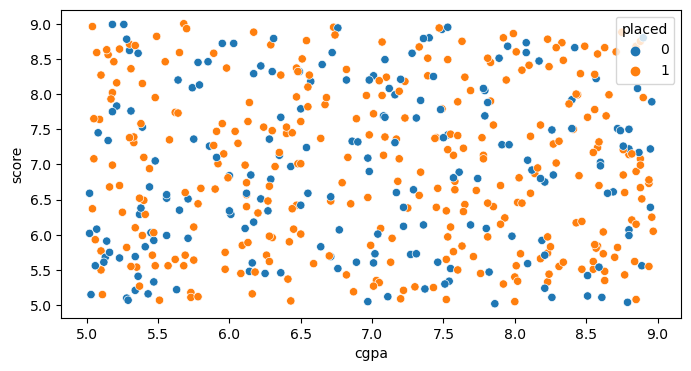

In [4]:
plt.figure(figsize=(8,4))
sns.scatterplot(x="cgpa",y="score",data=dataset,hue="placed")
plt.show()

In [6]:
x=dataset.iloc[:,:-1]
y=dataset["placed"]

In [7]:
from sklearn.model_selection import train_test_split

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [73]:
x_train.shape,y_train.shape

((400, 2), (400,))

In [74]:
from sklearn.preprocessing import FunctionTransformer

In [75]:
ft=FunctionTransformer(func=np.log1p)

In [76]:
x_train_ft=ft.fit_transform(x_train)

In [77]:
x_test_tf=ft.transform(x_test)

In [78]:
from sklearn.preprocessing import MinMaxScaler

In [79]:
mms=MinMaxScaler()

In [80]:
x_train_mms=mms.fit_transform(x_train_ft)

In [81]:
x_test_mms=mms.transform(x_test_tf)

In [82]:
from sklearn.tree import DecisionTreeClassifier

# Pree_Purning

In [86]:
dtc=DecisionTreeClassifier(max_depth=12,criterion="entropy")

In [87]:
dtc.fit(x_train_mms,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12)

In [88]:
dtc.score(x_test_mms,y_test)*100,dtc.score(x_train_mms,y_train)*100

(63.0, 73.75)

In [89]:
dtc.predict([[6.5,7.7]])

array([0])

In [90]:
from sklearn.tree import plot_tree

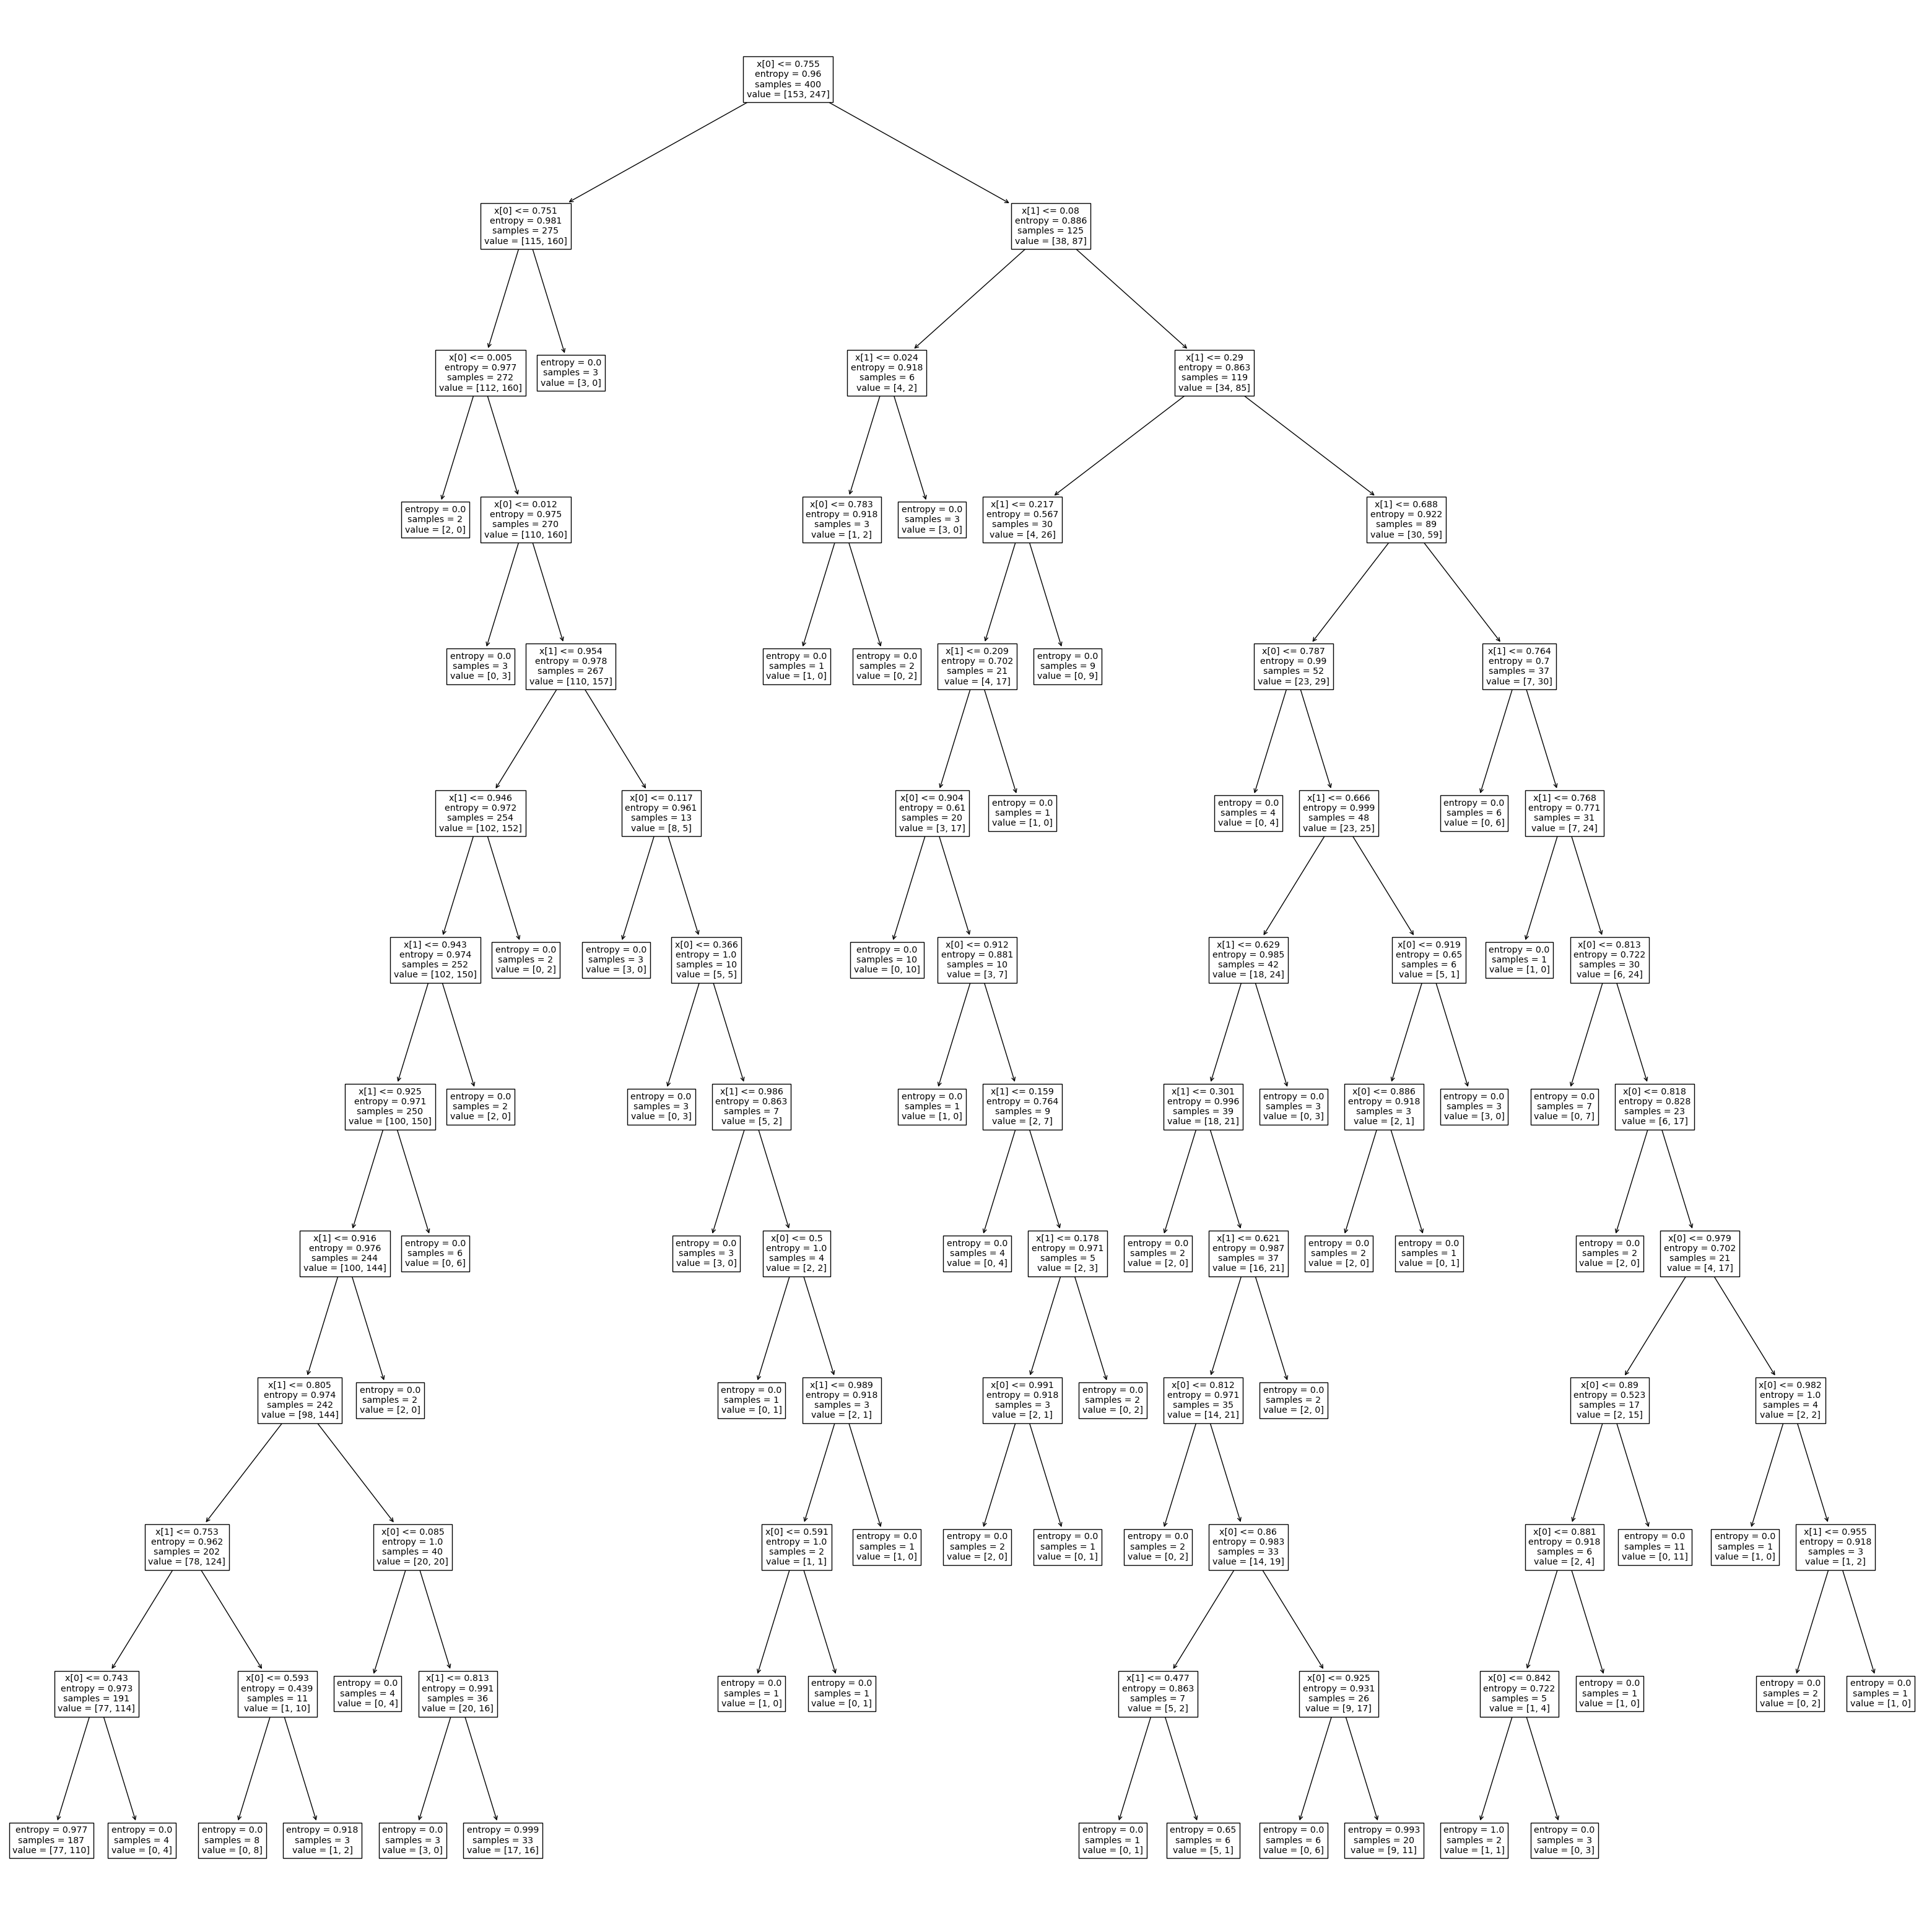

In [91]:
plt.figure(figsize=(40,40))
plot_tree(dtc)
plt.show()

In [92]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

In [93]:
cf=confusion_matrix(y_test,dtc.predict(x_test_mms))
cf

array([[ 5, 30],
       [ 7, 58]])

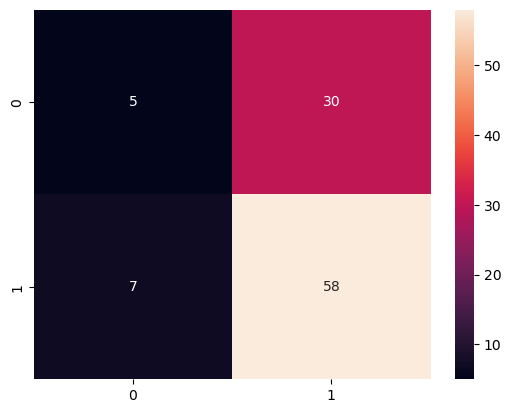

In [94]:
sns.heatmap(cf,annot=True)
plt.show()

# Post_Purning

In [96]:
for i in range(1,20):
    dtc1=DecisionTreeClassifier(criterion="entropy",max_depth=i)
    dtc1.fit(x_train_mms,y_train)
    print(dtc1.score(x_test_mms,y_test)*100,dtc1.score(x_train_mms,y_train)*100,i)

65.0 61.75000000000001 1
67.0 63.0 2
67.0 63.74999999999999 3
67.0 64.0 4
66.0 65.0 5
66.0 66.25 6
68.0 67.5 7
67.0 69.0 8
67.0 70.5 9
63.0 71.5 10
56.00000000000001 73.25 11
62.0 73.75 12
62.0 76.0 13
60.0 77.25 14
57.99999999999999 80.25 15
60.0 81.0 16
57.99999999999999 83.25 17
56.00000000000001 84.5 18
54.0 85.5 19


In [97]:
 dtc1=DecisionTreeClassifier(criterion="entropy",max_depth=9)

In [98]:
dtc1.fit(x_train_mms,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [100]:
dtc1.predict([[8.80,7.14]])

array([0])

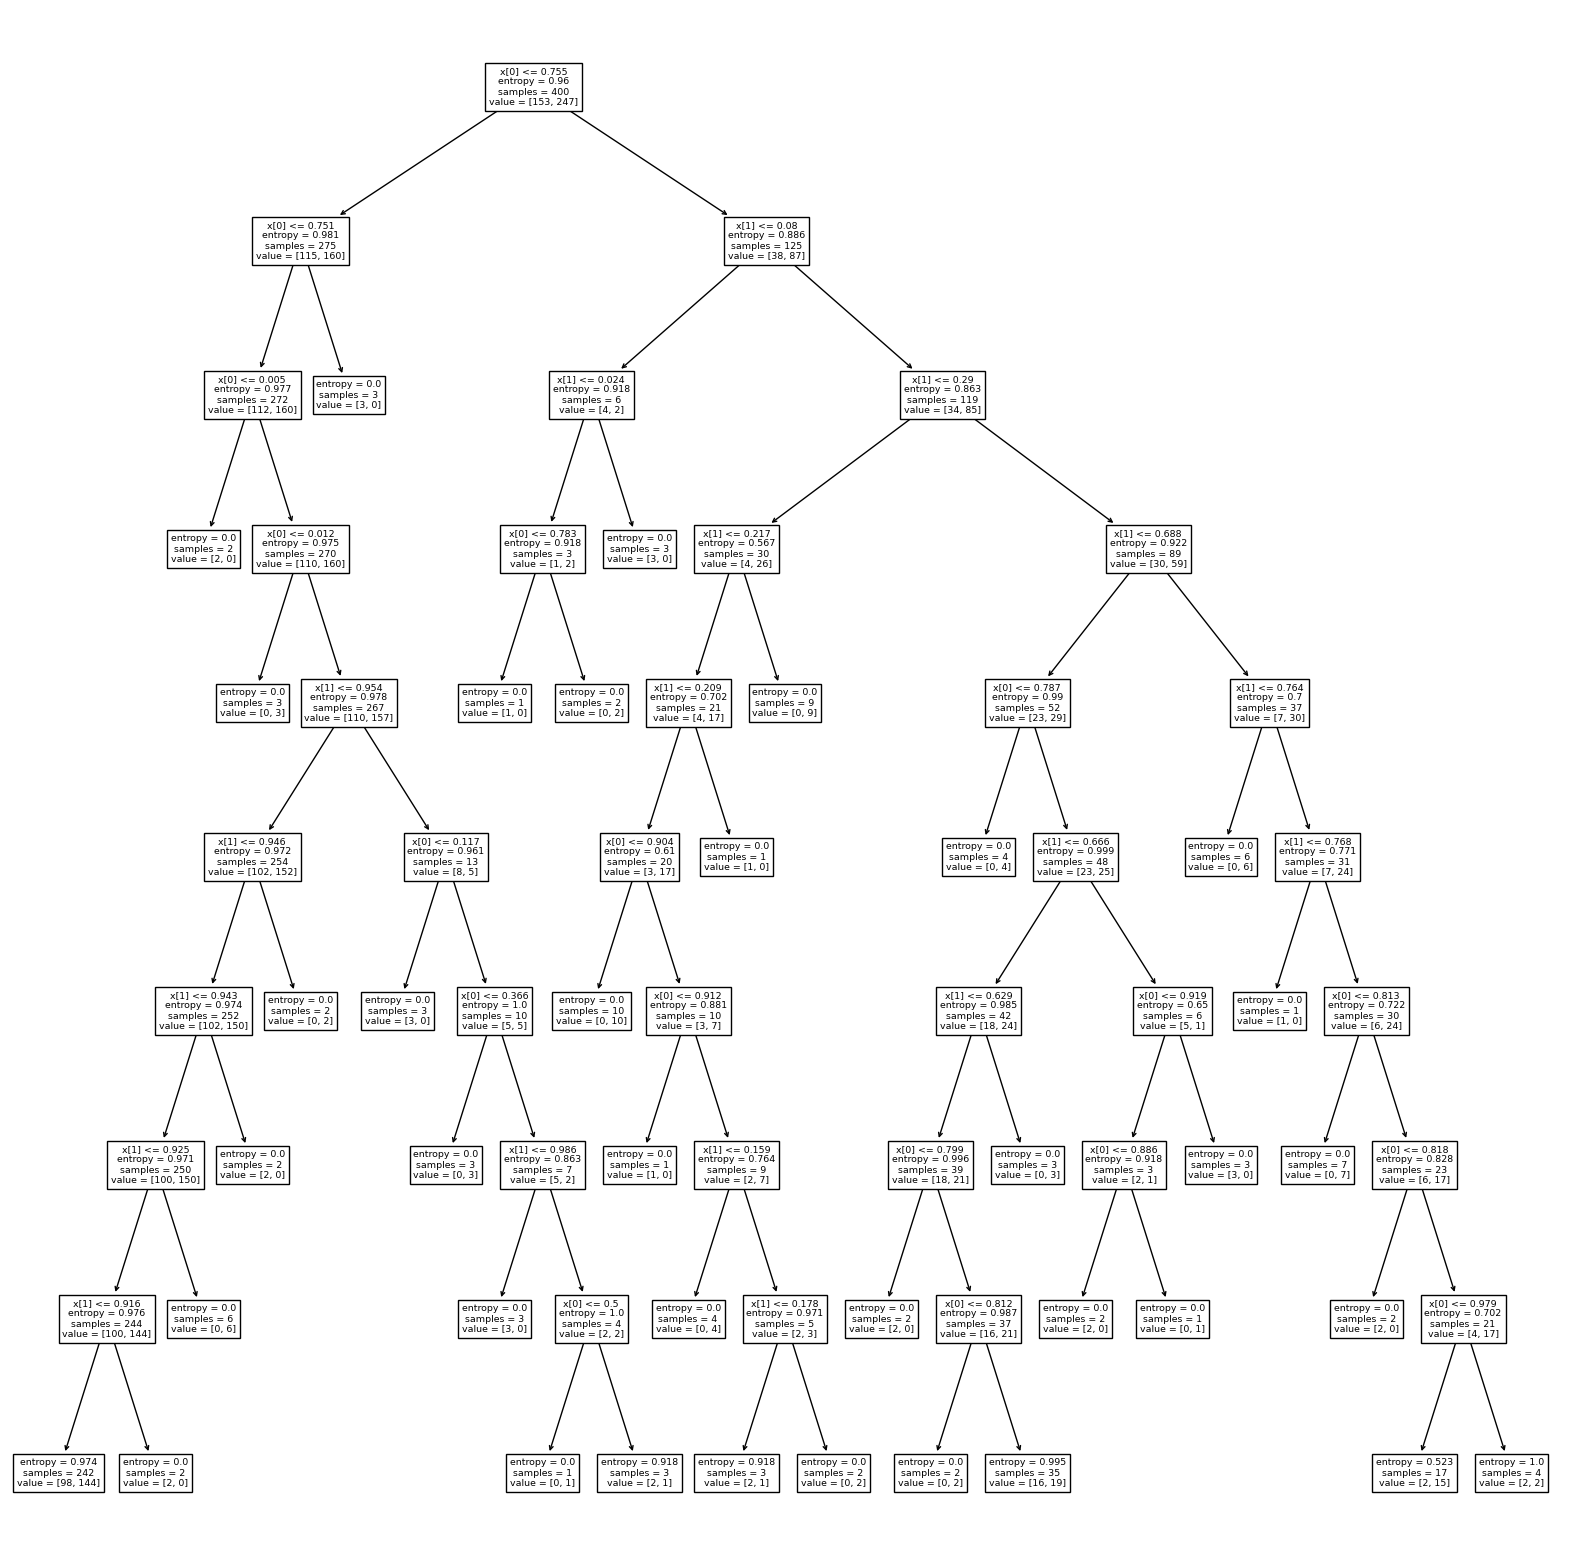

In [101]:
plt.figure(figsize=(20,20))
plot_tree(dtc1)
plt.show()

In [103]:
cf1=confusion_matrix(y_test,dtc1.predict(x_test_mms))
cf1

array([[ 4, 31],
       [ 3, 62]])

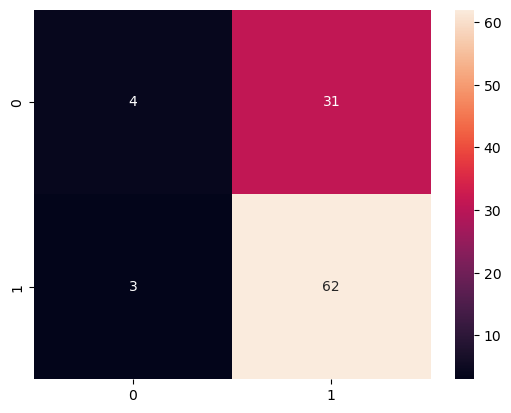

In [105]:
sns.heatmap(cf1,annot=True)
plt.show()